# Arduino Calibration

Take data with your arduino at known frequency. The goal is to match the known frequency to the Arduino's sampling frequency plot. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt

Mounted at /content/drive


# **LAB 3B**

In [ ]:
from scipy.fftpack import fft
import numpy as np
Underdamped_Data = np.loadtxt('/content/drive/MyDrive/Copy of 3B underdamped_0.csv')
Internal = np.loadtxt('/content/drive/MyDrive/Copy of Resonance_int20.csv')
OHMS100 = np.loadtxt('/content/drive/MyDrive/Copy of Resonance_100Ohm0.csv')
OHMS20 = np.loadtxt('/content/drive/MyDrive/Copy of Resonance_20ohm0 (1).csv')

(5749.0, 5775.0)

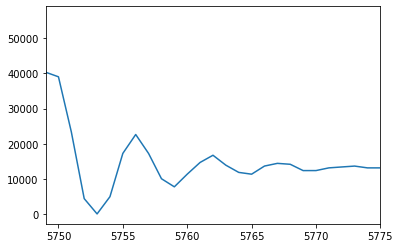

In [ ]:
f_guess = 30985.590778097983
nf_v = len(Underdamped_Data)
time_per_sample = 1. / f_guess 
frequencies = np.arange(nf_v) * f_guess / nf_v # Hz
time_Underdamped = np.arange(nf_v) * time_per_sample



plt.plot(Underdamped_Data)
x1 = 5749#5630
x2 = 5775#9650
plt.xlim([x1, x2])

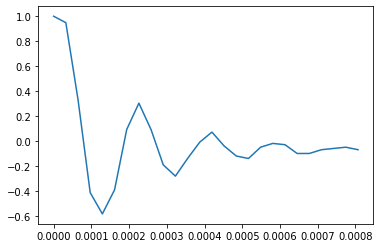

In [ ]:
#Trim your data down to just contain that single charge time

Underdamped = Underdamped_Data[x1:x2]

#Remove the DC offset from your new data


Underdamped = Underdamped - np.average(Underdamped)


Underdamped = Underdamped/max(Underdamped)
time_Underdamped = time_Underdamped[x1:x2] - time_Underdamped[x1]
#Replot your new trimmed data with time on the x-axis and voltage intensity on the y-axis
plt.plot(time_Underdamped, Underdamped)

In [ ]:
# Create the exponential curve
def rlc_underdamped(t, parameters):
  v_0 = parameters[0]
  alpha = parameters[1]
  w_0 = parameters[2]
  phi = parameters[3]
  v = v_0*np.exp(-alpha*t)*np.cos(w_0*t - phi)
  return v

def get_residuals_rlc(parameters, data, t):
  residuals = np.abs(data - rlc_underdamped(t, parameters))
  return -residuals

In [ ]:
# Perform least squares fit

from scipy.optimize import least_squares
R = 1000
L = 9*0.000001
C = 0.087*0.000001
w_0 = 1/np.sqrt(L*C)
alpha = R/(2*L)
gp = [1.,1., 1., 1.] 
res_lsq = least_squares(get_residuals_rlc, gp, args = (Underdamped,time_Underdamped))
parameters = res_lsq['x']
print(parameters)

[-1.28895785e+00  6.08510747e+03 -3.07366488e+04 -1.01858301e+01]


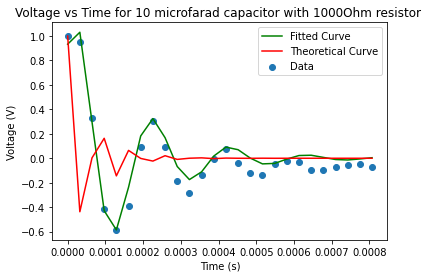

In [ ]:
# Create a fit curve
fit = parameters[0]*np.exp(-parameters[1]*time_Underdamped)*np.cos(parameters[2]*time_Underdamped - parameters[3])
plt.plot(time_Underdamped, fit, color = 'green', label = 'Fitted Curve')
plt.plot(time_Underdamped, rlc_underdamped(time_Underdamped, [1., (3/(2*0.1*0.001)), 1/np.sqrt(0.1*0.001*0.1*0.000001), 0]), color = 'red', label = 'Theoretical Curve')
plt.scatter(time_Underdamped, Underdamped, label = 'Data')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Voltage vs Time for 10 microfarad capacitor with 1000Ohm resistor ')
plt.legend()

In [ ]:
print([1., (3/(2*0.1*0.001)), 1/np.sqrt(0.1*0.001*0.1*0.000001), 0])

[1.0, 15000.0, 316227.7660168379, 0]


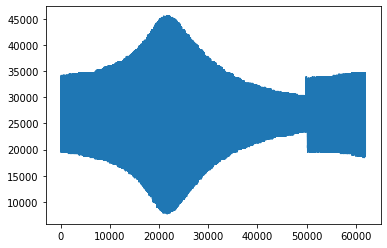

In [ ]:
plt.plot(OHMS20)

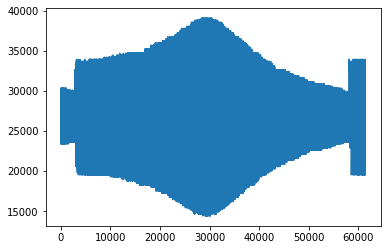

In [ ]:
plt.plot(OHMS100)

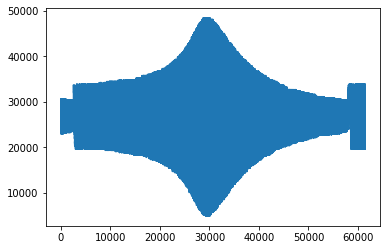

In [ ]:
plt.plot(Internal)